In [2]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
import matplotlib.ticker as ticker


In [2]:
# should find best way to niput dataframe form spots, and drop all columns by specifying axis, not .T

In [3]:
### PREP DATA ###

## MANUAL INPUT START ##
# read in data
target_file = 'PRISMA_BCET_SPOTS_ages_polygons.csv'
data = pd.read_csv(target_file, header = 0, index_col = 0) 
PRISMA_meta = pd.read_csv('PRISMA_meta.csv', header = 0, index_col = None)

#bad_bands_idx = np.r_[98:112, 145:160, 230:234] 
bad_bands_idx = np.r_[103:109, 152:155,158:160,230:234]
#bad_ages = ['3.36999988556', '16.4799995422','78.5'] # choose fan ages to drop, e.g. fan Ya
#data = data.drop(bad_ages, axis=1) 

## MANUAL INPUT END ##

# extract names, and disctionaries from data
band_names = PRISMA_meta.Band
nm_names = PRISMA_meta.nm.values
nm_names = np.round(nm_names,1)
band_dict_nm = pd.Series(PRISMA_meta.Name.values,index=nm_names).to_dict()
band_dict_idx  = pd.Series(PRISMA_meta.Name.values,index=PRISMA_meta.index.values).to_dict() # create dictionary of band names to wavelength
nm_dict = pd.Series(PRISMA_meta.nm.values,index=PRISMA_meta.Band).to_dict() # create dictionary of band names to wavelength
ages = np.array(data.columns.values.astype(float)) # save ages as an array for plotting
ages = np.round(ages, 2) # round age array 

#transform dataset
data = data.T

# "drop" bad bands & ages
# bands to drop, by index! i.e. band - 1
data.iloc[:,bad_bands_idx] = 0 # band bands as 0 for PCA

In [14]:
band_dict_nm

{402.4: 'Band 1',
 411.3: 'Band 2',
 419.4: 'Band 3',
 427.0: 'Band 4',
 434.3: 'Band 5',
 441.7: 'Band 6',
 449.0: 'Band 7',
 456.4: 'Band 8',
 463.7: 'Band 9',
 470.9: 'Band 10',
 478.2: 'Band 11',
 485.4: 'Band 12',
 492.7: 'Band 13',
 500.1: 'Band 14',
 507.7: 'Band 15',
 515.2: 'Band 16',
 522.9: 'Band 17',
 530.7: 'Band 18',
 538.5: 'Band 19',
 546.5: 'Band 20',
 554.6: 'Band 21',
 562.7: 'Band 22',
 571.0: 'Band 23',
 579.4: 'Band 24',
 587.8: 'Band 25',
 596.5: 'Band 26',
 605.4: 'Band 27',
 614.2: 'Band 28',
 623.2: 'Band 29',
 632.1: 'Band 30',
 641.3: 'Band 31',
 650.8: 'Band 32',
 660.3: 'Band 33',
 669.8: 'Band 34',
 679.5: 'Band 35',
 689.4: 'Band 36',
 699.1: 'Band 37',
 709.0: 'Band 38',
 719.2: 'Band 39',
 729.2: 'Band 40',
 739.4: 'Band 41',
 749.7: 'Band 42',
 760.1: 'Band 43',
 770.5: 'Band 44',
 780.9: 'Band 45',
 791.4: 'Band 46',
 801.9: 'Band 47',
 812.5: 'Band 48',
 823.1: 'Band 49',
 833.8: 'Band 50',
 844.4: 'Band 51',
 855.2: 'Band 52',
 865.9: 'Band 53',
 8

In [187]:
# data for plotting (nan instead of 0 for bad bands)

data_plot = pd.read_csv(target_file, header = 0, index_col = 0) 
data_plot = data_plot.drop(bad_ages, axis=1)
data_plot = data_plot.T
data_plot.iloc[:,bad_bands_idx] = np.nan # band bands as nan for plotting
data_plot.iloc[:,232:] = np.nan

In [5]:
#plot

target_x = nm_names
target_y = data_plot
target_names = ages

N = len(target_y) - 1 # number of objects to plot i.e. color cycle count

plt.rcParams["figure.figsize"] = [16,7] # fig size
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.PiYG(np.linspace(0,1,N))) # colors to cycle through, choose default like 'viridis' or 'PiYG'

fig, ax = plt.subplots()
for i in range(N):
    ax.plot(target_x, target_y.iloc[i], label = target_names[i]) # for i in range of objects, plot x,y

#axes
plt.xticks(fontsize = 10, rotation=70, size = 8)
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
plt.xlabel('Wavelength (nm)', fontsize = 14)
plt.yticks(fontsize = 12)
plt.ylabel('Normalized Relative Reflectance', fontsize = 13)
plt.title("Spectral Profile", size = 14)
plt.title
plt.xlim(375,2500)

# legend location
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * .9])

ax.legend(loc='lower left', bbox_to_anchor=(1, 0),
          fancybox=True, shadow=True, ncol=1, title = 'Age (ky)') # Put a legend below current axis

plt.rcdefaults() # reset global plt parameters, IMPORTANT!
plt.show()

NameError: name 'data_plot' is not defined

In [6]:
n_modes = np.min(np.shape(data)) 
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(data)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

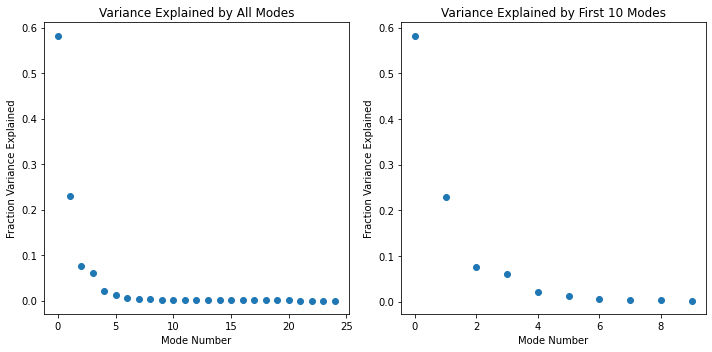

0.582182458656249

In [7]:
# plot fraction of variance explained by each mode
# pull out ages as array

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar)),fracVar)
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by All Modes')

plt.subplot(1,2,2)
n_modes_show = 10
plt.scatter(range(n_modes_show),fracVar[:n_modes_show])
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

plt.show()

var_exp = fracVar[0] #+ fracVar[1] + fracVar[2] + fracVar[3]
var_exp

In [17]:
round(fracVar[0],2)

0.54

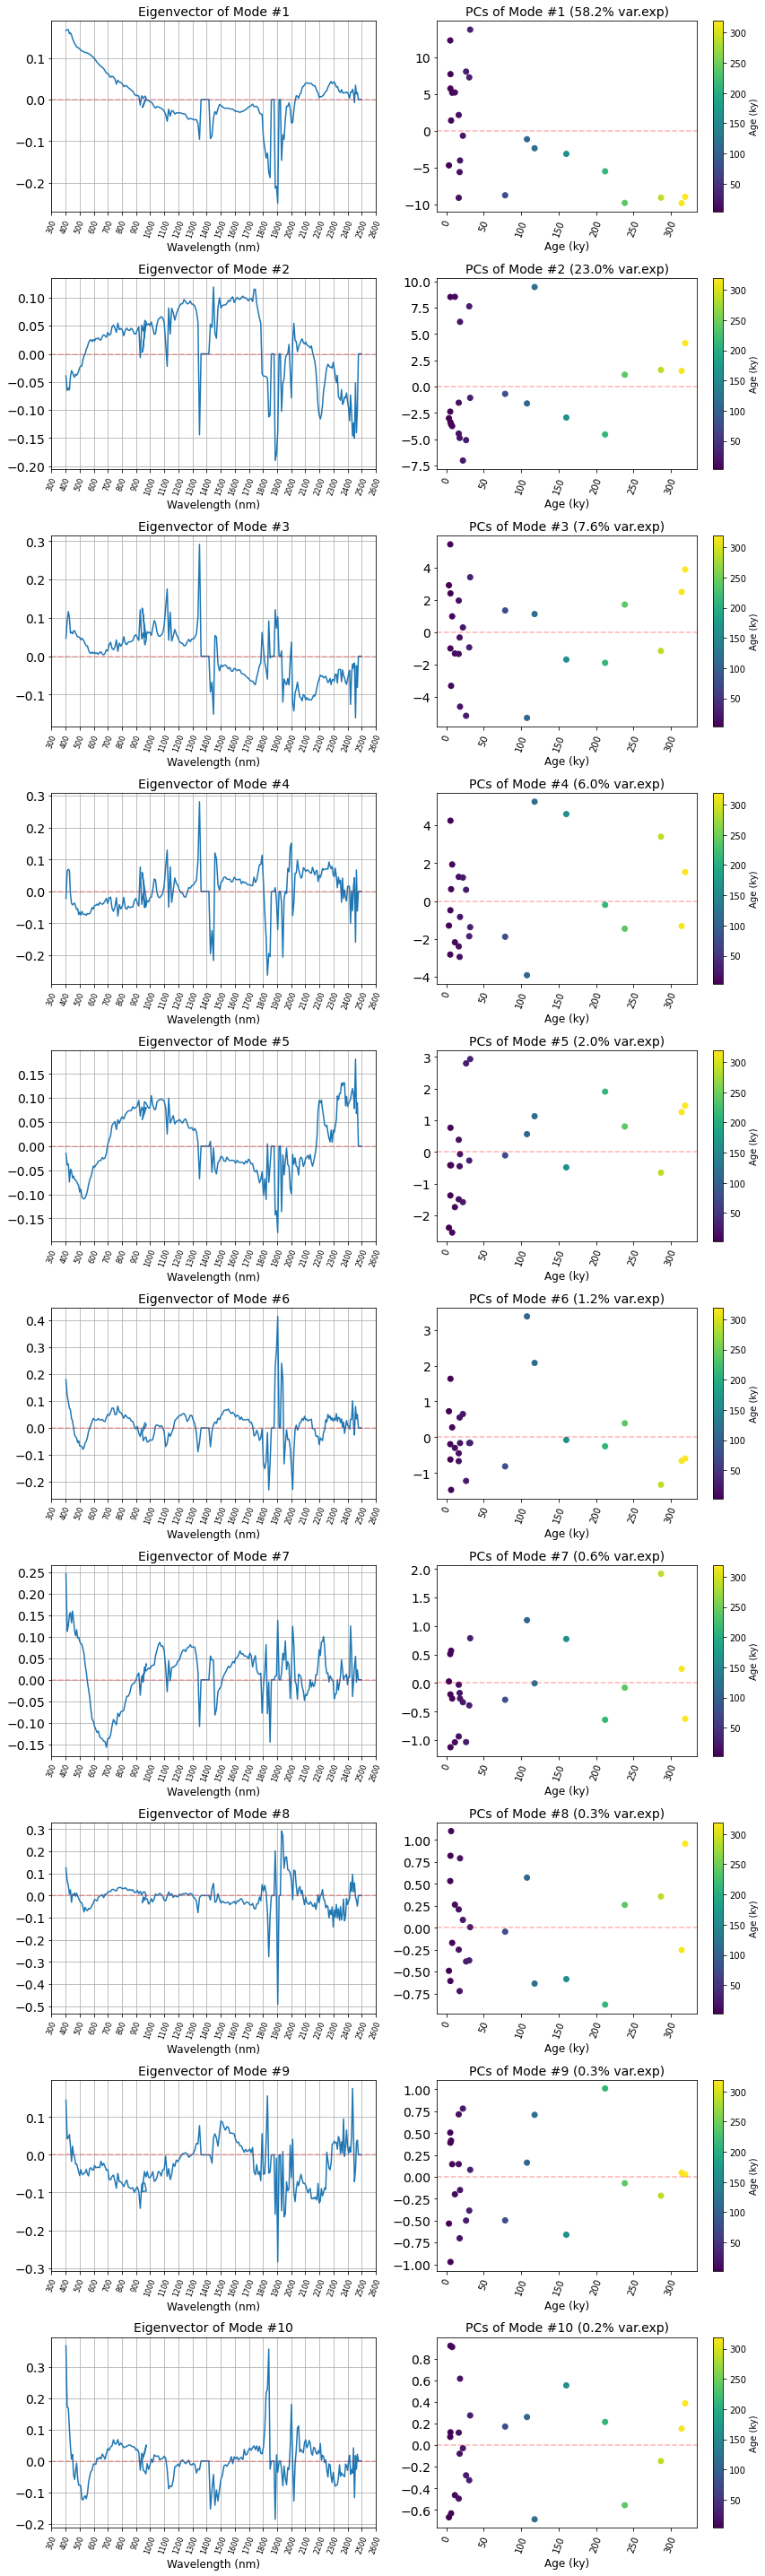

In [15]:
#plot the first n modes and PCs
n = 10

plt.figure(figsize=(12,4*n))
for kk in range(n):
    
    ax = plt.subplot(n,2,kk*2+1)
    plt.plot(nm_names, eigvecs[kk,:]) # extrat ages as an array and do plt.plot(PCs[:,kk], ages)
    plt.title('Eigenvector of Mode #' + str(kk+1), fontsize = 14)
    plt.xlabel('Wavelength (nm)', fontsize = 12)
    plt.xticks(fontsize = 10, rotation=70, size = 8)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
    plt.yticks(fontsize = 14)
    plt.axhline(y=0.0, color='r', linestyle='--', alpha = 0.3)
    plt.grid()
    
    plt.subplot(n,2,(kk+1)*2)
    #plt.plot(ages[1:],PCs[:,kk][1:], color = 'black')
    #plt.plot(ages_precip_proxy, precip_proxy['dO18'], color = 'lightblue', alpha =.8 ,label = 'Wang 2007 Regional d18O (precip. proxy)')
    #plt.plot(ages_proxy, ice_proxy['dO18'], color = 'red', alpha =.8 ,label = 'Korner 2002 Global d18O (temp. proxy)')
    plt.scatter(ages[1:],PCs[:,kk][1:], c = ages[1:])
    plt.colorbar(label = 'Age (ky)')
    plt.title('PCs of Mode #' + str(kk+1) + ' ({}% var.exp)'.format(round(fracVar[kk]*100,1)), fontsize = 14)
    plt.xlabel('Age (ky)', fontsize = 12)
    plt.xticks(fontsize = 14, rotation=70, size = 10)
    plt.yticks(fontsize = 14)  
    plt.tight_layout()
    plt.xlim()
    plt.axhline(y=0.0, color='r', linestyle='--', alpha = 0.3)
    
plt.show()

# yonger fan variation may be due to water on the fans, which effects the signal. Drier fans
# color by location
# invesitgate the PC1, for its age. 

In [226]:
## TARGET PC ##
target_PC = 0
target_PC = PCs[:,target_PC]
target_PC = target_PC

PC0 = PCs[:,0]
PC1 = PCs[:,1]
PC2 = PCs[:,2]
PC3 = PCs[:,3]
PC4 = PCs[:,4]

#target_PC =PC0 + PC1 /2

(-15.961000000000002, 335.18100000000004)

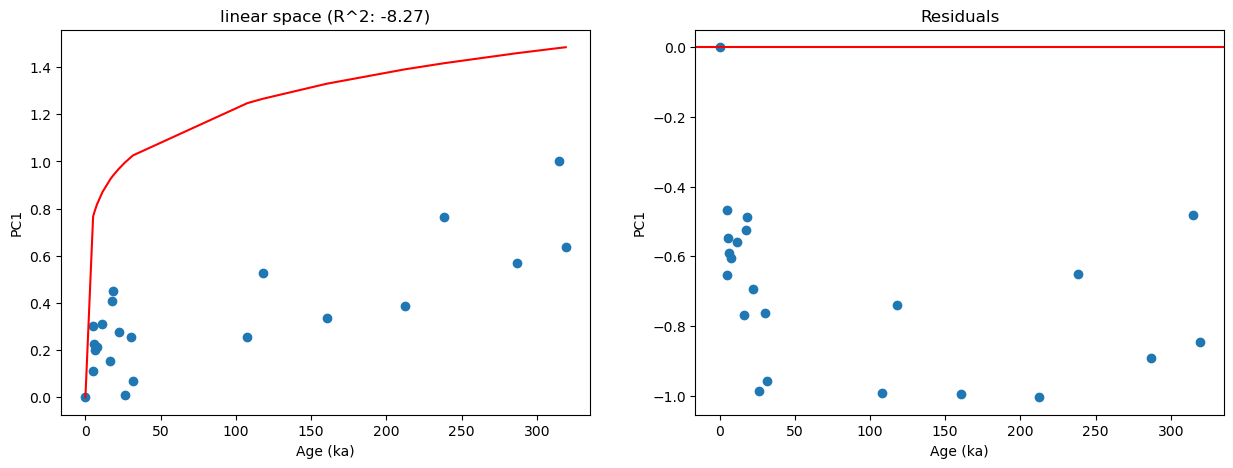

In [228]:
# define steady weathering rate of granites (White and Brandtly, 2001)
def weathering_rate(time):
    #a = 3.31e-13 # white 2001
    #b = 0.61 # white 2001
    a = 0.2691 # nui et al. 2019
    b = 0.1679 # nui et al. 2018
    a = 0.59 # constant D'arcy
    b = 0.16 # exponent D'arcy
    rate = a*(time**b)
    return(rate)

PC1_posative = (target_PC-min(target_PC))/(max(target_PC)-min(target_PC))

wr = weathering_rate(ages)
#PC1_posative = target_PC  - target_PC.min()
residuals = PC1_posative - wr

# correlation coefficient (r^2)
r2 = r2_score(PC1_posative, wr)
r2 = round(r2,2)

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(ages, PC1_posative)
plt.plot(ages, wr, color='red')
plt.xlabel('Age (ka)')
plt.ylabel('PC1')
plt.title('linear space (R^2: {})'.format(r2))
#plt.xscale('log')
#plt.yscale('log')


plt.subplot(1,2,2)
plt.scatter(ages, residuals)
plt.axhline(y=0.0, color='r', linestyle='-')
plt.xlabel('Age (ka)')
plt.ylabel('PC1')
plt.title('Residuals'.format(r2))

plt.xlim()

linear: y=0.0x+[[0.18]]
Power funtion: y = 1.0x^[[0.18]]


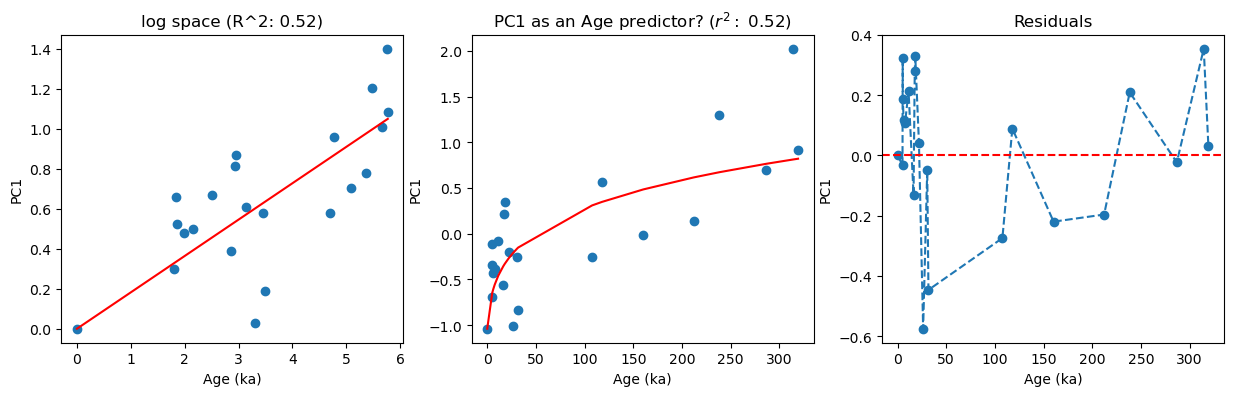

In [230]:
# Fit Power law function and take resiudals (without 0)
# take ln of x and y, run linear regression, plot and unpack
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import spearmanr

# data
PC1 = target_PC
PC1_posative = (PC1 - PC1.min()) + 1 # scale PC1 to remove negatives, and add 1 to compute log(0) as 0

ages = np.array(data.T.columns.values.astype(float)) # save ages as an array for plotting
ages = np.round(ages, 2)
ages_log = ages + 1   # add 1 to compute log(0) as 0

# take natural log
ages_log = np.log(ages_log) 
PC1_log = np.log(PC1_posative)

# run linear regression
X = ages_log.reshape(-1,1) # values converts it into a numpy array
Y = PC1_log.reshape(-1,1) # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression(fit_intercept=False)  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make Y predictions from regression line

# calculate residuals
residuals = Y - Y_pred
residuals = residuals.reshape(1,-1)
residuals = residuals[0]

# unpack from log-log into linear space, as origionally scaled 
Y_pred_unpacked = (np.exp(Y_pred))
Y_pred_unpacked = Y_pred_unpacked - 1
Y_pred_unpacked = Y_pred_unpacked + PC1.min()

Y_unpacked = (np.exp(Y))
Y_unpacked = Y_unpacked - 1
Y_unpacked = Y_unpacked + PC1.min()

X_unpacked = (np.exp(X)) - 1

# correlation coefficient (r^2)
r2 = r2_score(Y, Y_pred)
r2 = round(r2,2)

#rho, p = spearmanr(Y, Y_pred)
#spearmans_r2 = rho**2

# plot results
plt.figure(figsize = (15,4))
plt.subplot(1,3,1)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel('Age (ka)')
plt.ylabel('PC1')
plt.title('log space (R^2: {})'.format(r2))

plt.subplot(1,3,2)
plt.scatter(X_unpacked, Y_unpacked)
plt.plot(X_unpacked, Y_pred_unpacked, color='red')
plt.xlabel('Age (ka)')
plt.ylabel('PC1')
plt.title('PC1 as an Age predictor? ($r^2:$ {})'.format(r2))


plt.subplot(1,3,3)
plt.scatter(X_unpacked, residuals)
plt.plot(X_unpacked, residuals, linestyle = '--')
plt.axhline(y=0.0, color='r', linestyle='--')
plt.xlabel('Age (ka)')
plt.ylabel('PC1')
plt.title('Residuals'.format(r2))

# Equations
B = np.round(linear_regressor.coef_,2)
A = np.round(linear_regressor.intercept_,2)
A_pl = np.round(np.exp(A),2)
print('linear: y={}x+{}'.format(A,B))
print('Power funtion: y = {}x^{}'.format(A_pl,B))

Text(0.5, 1.0, 'Residuals')

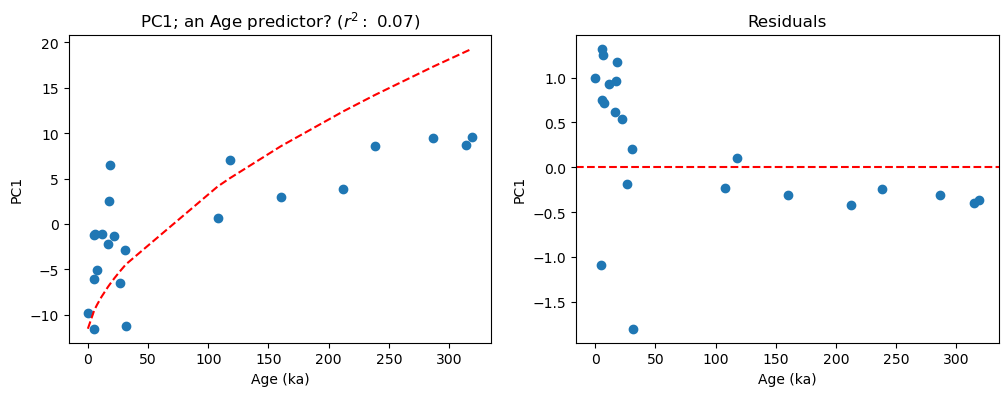

In [195]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(X_unpacked, Y_unpacked)
plt.plot(X_unpacked, Y_pred_unpacked, color='red', linestyle = '--')
plt.xlabel('Age (ka)')
plt.ylabel('PC1')
plt.title('PC1; an Age predictor? ($r^2:$ {})'.format(r2))

plt.subplot(1,2,2)
plt.scatter(X_unpacked, residuals)
plt.axhline(y=0.0, color='r', linestyle='--')
plt.xlabel('Age (ka)')
plt.ylabel('PC1')
plt.title('Residuals'.format(r2))


0.0003514893311830927

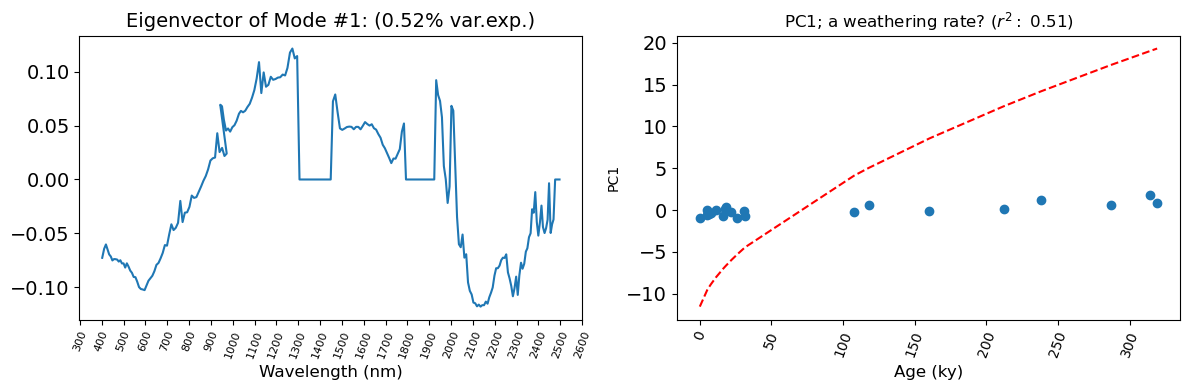

In [202]:
plt.figure(figsize=(12,4))

ax = plt.subplot(1,2,1)
plt.plot(nm_names, eigvecs[0,:]) # extrat ages as an array and do plt.plot(PCs[:,kk], ages)
plt.title('Eigenvector of Mode #1: ({}% var.exp.)'.format(round(fracVar[0],2)), fontsize = 14)
plt.xlabel('Wavelength (nm)', fontsize = 12)
plt.xticks(fontsize = 10, rotation=70, size = 8)
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
plt.yticks(fontsize = 14)
    
plt.subplot(1,2,2)
#plt.plot(ages[1:],PCs[:,kk][1:], color = 'black')
#plt.plot(ages_precip_proxy, precip_proxy['dO18'], color = 'lightblue', alpha =.8 ,label = 'Wang 2007 Regional d18O (precip. proxy)')
#plt.plot(ages_proxy, ice_proxy['dO18'], color = 'red', alpha =.8 ,label = 'Korner 2002 Global d18O (temp. proxy)')
plt.scatter(ages,PCs[:,0])#, c = ages)
#plt.plot(X_unpacked, Y_pred_unpacked, color='red', linestyle = '--')
plt.plot(X_unpacked, Y_pred_unpacked, color='red', linestyle = '--')
plt.xlabel('Age (ka)')
plt.ylabel('PC1')
plt.title('PC1; a weathering rate? ($r^2:$ {})'.format(r2))
#plt.colorbar(label = "Age (ky)")
#plt.title('PCs of Mode #1'.format(r2), fontsize = 14)
plt.xlabel('Age (ky)', fontsize = 12)
plt.xticks(fontsize = 14, rotation=70, size = 10)
plt.yticks(fontsize = 14)  
plt.tight_layout()
plt.xlim()
    
plt.show()

In [162]:
eigval_all = [eigval_dict[i] for i in E_array]
abs_eigval_all = abs(np.array(eigval))

KeyError: 0.10077698794678003

In [169]:
# identifiy largest magnitude eigenvalues
E = eigvecs[0]
E_array = np.array(E)
E_abs = abs(E)

print(np.min(E))
print(np.argwhere(E_array == np.min(E)))
print(np.max(E))
print(np.argwhere(E_array == np.max(E)))

specific_vale = .05
print(abs(E_array) > specific_vale)
np.argwhere(abs(E_array) > specific_vale)

-0.1342467371038571
[[160]]
0.19967003777206366
[[2]]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False  True
 False False  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False False False False  True  True False False  True
  True False False False False False False False False False False Fal

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 81],
       [ 83],
       [ 86],
       [ 87],
       [ 88],
       [ 89],
       [ 90],
       [ 91],
       [ 92],
       [ 93],
       [ 94],
       [ 95],
       [ 96],
       [ 97],
       [121],
       [122],
       [123],
       [124],
       [125],
       [126],
       [127],
       [128],
       [129],
       [130],
       [131],
       [132],
       [133],
       [134],
       [139],
       [140],
      

In [65]:
# print wavelength of target band
eigval_dict = pd.Series(E_array,index=PRISMA_meta.index.values).to_dict()

target_eig = 183
print(eigval_dict[target_eig])
print(nm_dict[target_eig])

-0.105794276151844
2118.9553


In [85]:
nm_dict[48]

812.5399

In [79]:
t = np.argwhere(abs(E_array) > threshold)
t =t.reshape(1,-1)[0]

nm_dict[]

KeyError: 0

In [172]:
eigval_dict = pd.Series(E_array,index=PRISMA_meta.index.values).to_dict()
E = eigvecs[0]
E_array = np.array(E)

threshold = 0.08
eig_idx = np.argwhere(abs(E_array) > threshold)
eig_idx = eig_idx.reshape(1,-1)[0]
eig_idx = eig_idx +1

eigval = [eigval_dict[i] for i in eig_idx]
abs_eigval = abs(np.array(eigval)) 


key_bands = pd.DataFrame({'eigval': eigval,
                          'abs_eigval': abs_eigval,
                          'band': eig_idx, 
                          'nm':[nm_dict[j] for j in eig_idx]}
                        )

key_bands.sort_values(by='abs_eigval', ascending=False)

,eigval,abs_eigval,band,nm
1,0.199670,0.199670,2,411.3164
0,0.199269,0.199269,1,402.4402
2,0.189913,0.189913,3,419.3725
3,0.189905,0.189905,4,426.9674
4,0.184883,0.184883,5,434.3084
5,0.175936,0.175936,6,441.6589
6,0.170727,0.170727,7,449.0336
7,0.165311,0.165311,8,456.3773
8,0.160320,0.160320,9,463.7310
9,0.156083,0.156083,10,470.9489


In [231]:
# long term dO18 record
# import data
from numpy import linspace, loadtxt, ones, convolve

def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

# prep data
O18_global = pd.read_csv('O18_global_karner2002.csv', header = 0)
O18_global = O18_global.rename(columns={O18_global.columns[0]: "age", O18_global.columns[1]: 'dO18'})
O18_global = O18_global.replace({999:np.NaN})

#O18_global = O18_global.reset_index(drop = True) # reset row index
#O18_global['dO18'] = O18_global['dO18'] * -1 # inverse the data 

ages_fans = ages[ages > 0] # fans with ages > 0 

ice_proxy = O18_global.loc[O18_global['age'] >= ages_fans.min()] # paleo data with ages > 0 
ice_proxy = ice_proxy.loc[ice_proxy['age'] <= max(ages_fans)] # paleo data with ages < max age chosen
ages_proxy = ice_proxy['age']

fans = residuals[1:]
#fans = target_PC[1:]

# normalize each dataset
ice_proxy['dO18'] = (ice_proxy['dO18'] - ice_proxy['dO18'].mean())/ice_proxy['dO18'].std()
fans = (fans - fans.mean())/fans.std()


Text(0.5, 1.0, 'Global Paleoclimate: Global Temperature ($r^2 = $ 0.19)')

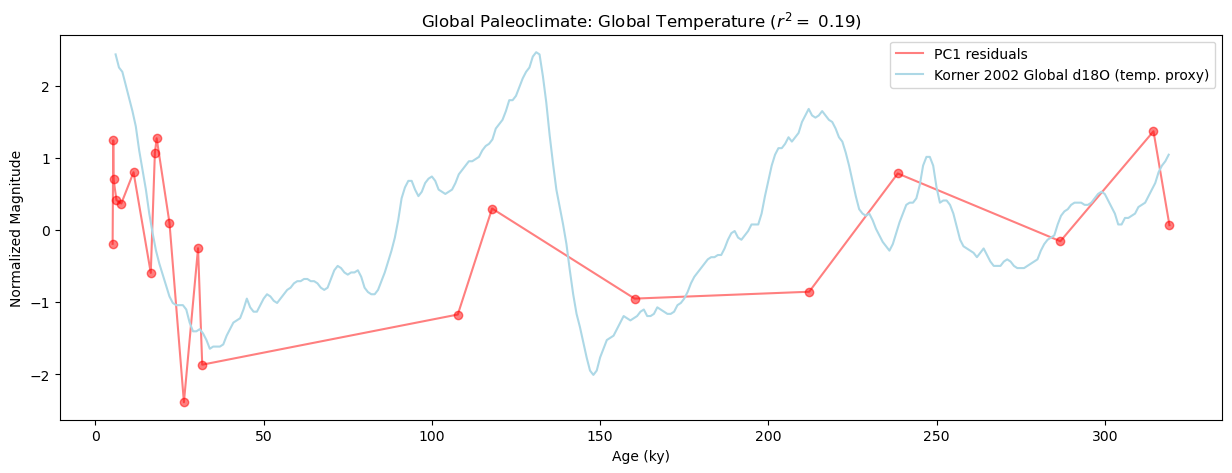

In [247]:
# Plot
fans_avg = movingaverage(fans, 1)
#fan_pts = np.interp(ages_proxy, ages_fans, fans)
window = 1
ice_proxy_avg = movingaverage(ice_proxy['dO18'], window)
yrs_per_window = (ice_proxy['dO18'].max() - ice_proxy['dO18'].min())/len(ice_proxy['dO18'])
yrs_per_window = round(yrs_per_window * window, 1)

plt.figure(figsize = (15,5))
plt.scatter(ages_fans, fans, color = 'red', alpha = 0.5) # residual data 
plt.plot(ages_fans, fans_avg, color = 'red', alpha = 0.5, label = 'PC1 residuals')
#plt.plot(ages_proxy, ice_proxy_avg, color = 'lightblue', alpha = 1,label = 'Korner 2002 Global d18O (temp. proxy): moving avergae = {} ky'.format(yrs_per_window)) 
plt.plot(ages_proxy, ice_proxy_avg, color = 'lightblue', alpha = 1,label = 'Korner 2002 Global d18O (temp. proxy)')
plt.title('Paleoclimate (dO18 Global temp. proxy')
plt.xlabel('Age (ky)')
plt.ylabel('Normalized Magnitude')
plt.legend()
plt.xlim()

# correlation coefficient (r --> r^2)

ice_proxy_pts = np.interp(ages_fans, ice_proxy['age'], ice_proxy_avg) # interpret y values at given x (same shape for r^2)
fans_pts = np.interp(ages_proxy, ages_fans, fans) # extract points for every proxy value
#x_values = fans_pts[30:]
#y_values = ice_proxy_avg[30:]
x_values = fans
y_values = ice_proxy_pts
correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
rho, p = spearmanr(x_values, y_values)

plt.title('Global Paleoclimate: Global Temperature ($r^2 = $ {})'.format(round(r_squared,2)))

In [17]:
rho

-0.023809523809523815

In [239]:
# Prepare and trim data to ~LGM
# O18 proxy plot
O18 = pd.read_csv('O18_Wang_etal_2007.csv', header = 0)
O18 = O18.rename(columns={'Age (ky B.P.)': "age", 'd18O (per mil, VPDB)': "dO18"})
O18['dO18'] = O18['dO18'] * -1 # inverse the data (so it plots like precip i.e. high value is high precip)
O18.head()

max_age = 110  # Ka

ages_fans_precip = ages[ages > 0] # fans with ages > 0 
ages_fans_precip = ages_fans_precip[ages_fans_precip <= max_age] # fans with ages < max age chosen

precip_proxy = O18.loc[O18['age'] >= ages_fans_precip.min()] # paleo data with ages > 0 
precip_proxy = precip_proxy.loc[precip_proxy['age'] <= max_age] # paleo data with ages < max age chosen
ages_precip_proxy = precip_proxy['age']

#fans_precip = residuals[1:len(ages_fans_precip)+ 1]
fans_precip = target_PC[1:len(ages_fans_precip)+ 1]

# normalize each dataset
precip_proxy['dO18'] = (precip_proxy['dO18'] - precip_proxy['dO18'].mean())/precip_proxy['dO18'].std()
fans_precip = (fans_precip - fans_precip.mean())/fans_precip.std()


#extract corresponding O18 (y) values @ PC1 ages (PC1 X locations)
precip_proxy_pts = np.interp(ages_fans_precip, precip_proxy['age'], precip_proxy['dO18']) # extract proxy points for every age value 
#fans_pts = np.interp(ages_proxy, ages_fans_precip, fans) # extract points for every proxy value

Text(0.5, 1.0, 'Regional Paleoclimate (precipitation): ($r^2 = $ 0.21)')

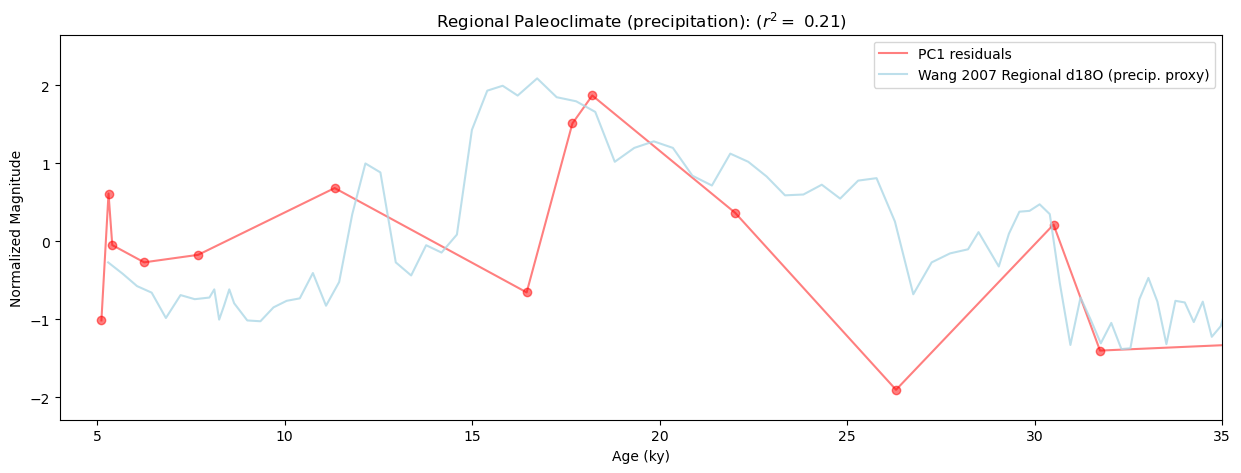

In [244]:
# plot paleoclimate data against PC1
# add moving average, a window of 1 is none

window = 1
precip_proxy_avg = movingaverage(precip_proxy['dO18'], window) 
yrs_per_window = (precip_proxy['dO18'].max() - precip_proxy['dO18'].min())/len(precip_proxy['dO18'])
yrs_per_window = round(yrs_per_window * window, 1)
precip_proxy_pts = np.interp(ages_fans_precip, precip_proxy['age'], precip_proxy_avg) # extract proxy points for every age value 

fans_precip_avg = movingaverage(fans_precip, 1) 
fans_precip_pts = np.interp(ages_proxy, ages_fans_precip, fans_precip)

# Plot
plt.figure(figsize = (15,5))
plt.scatter(ages_fans_precip, fans_precip, color = 'red', alpha = 0.5) # residual data 
plt.plot(ages_fans_precip, fans_precip_avg, color = 'red', alpha = 0.5, label = 'PC1 residuals')
plt.plot(ages_precip_proxy, precip_proxy['dO18'], color = 'lightblue', alpha =.8 ,label = 'Wang 2007 Regional d18O (precip. proxy)')
#plt.plot(ages_proxy, precip_proxy_avg, color = 'blue', alpha = .4 ,label = 'Wang 2007 Regional d18O (precip. proxy)'.format(yrs_per_window)) 
plt.title('Paleoclimate (dO18 Global temp. proxy', size = 12)
plt.xlabel('Age (ky)', size = 10)
plt.ylabel('Normalized Magnitude', size = 10)
plt.legend()
plt.xlim(4,35)

# correlation coefficient (r --> r^2)
x_values = fans_precip[:13]
y_values = precip_proxy_pts[:13] # correlation to approximetly 35ka

correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
rho, p = spearmanr(x_values, y_values)

plt.title('Regional Paleoclimate (precipitation): ($r^2 = $ {})'.format(round(r_squared,2)))

In [23]:
p

0.3839365166506742

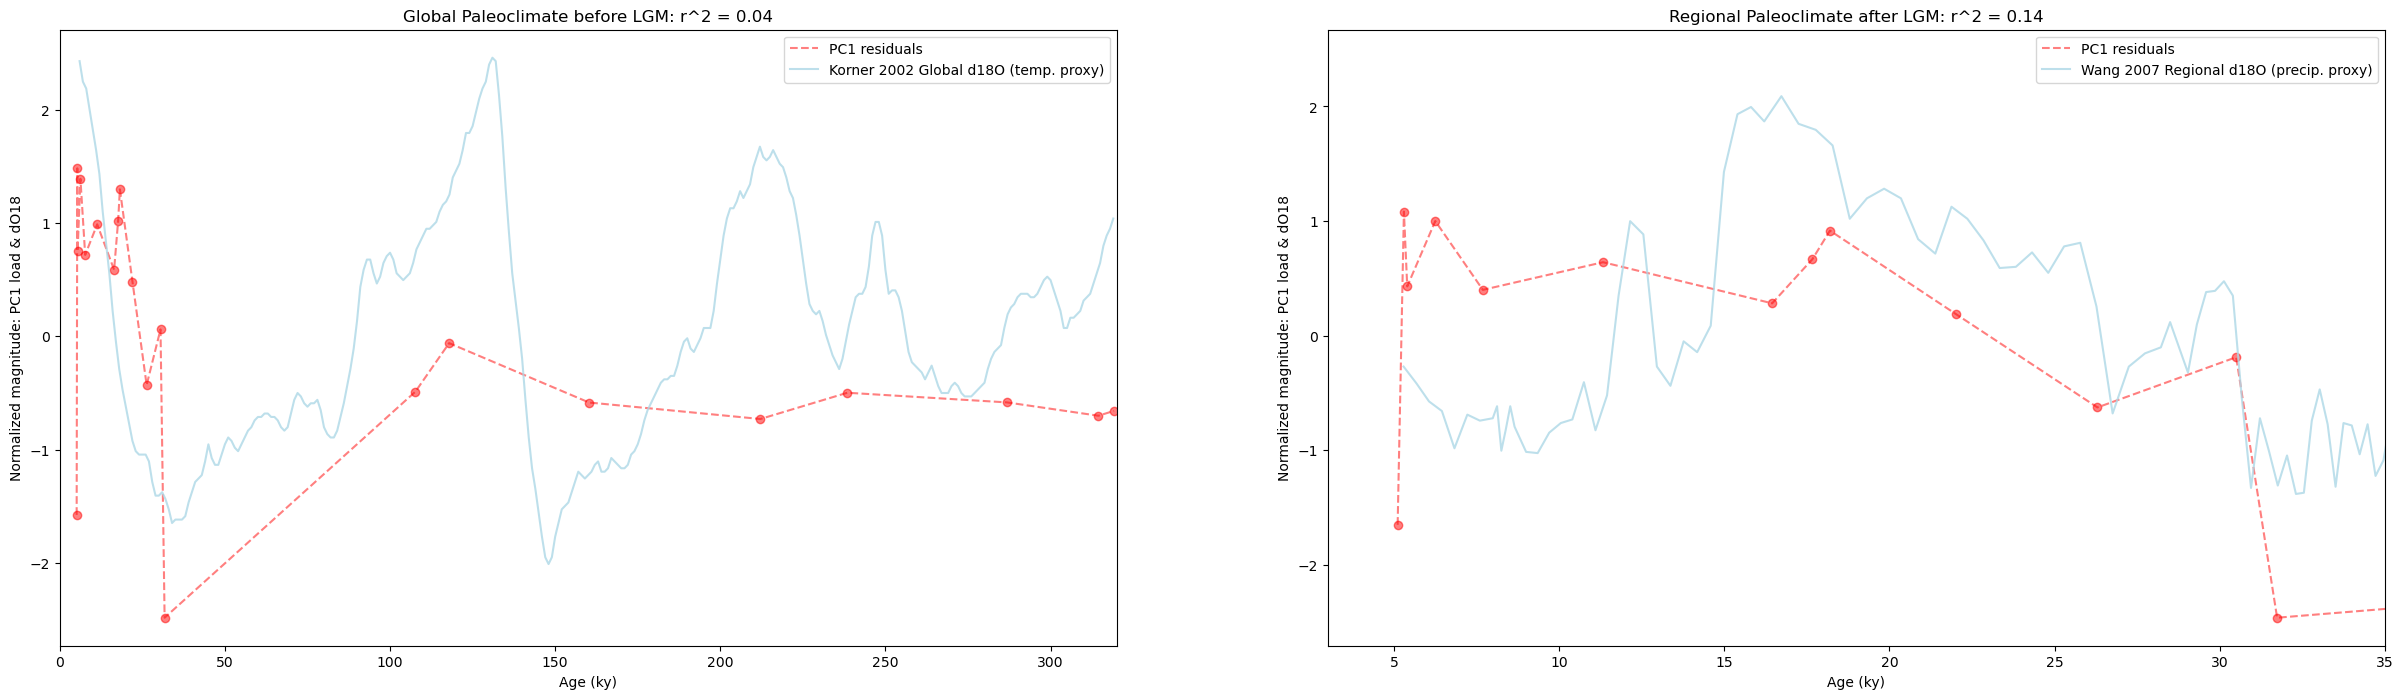

In [185]:
## PLOT ##

# global proxy
#fans_avg = movingaverage(fans, 1)
#fan_pts = np.interp(ages_proxy, ages_fans, fans)
window = 70
ice_proxy_avg = movingaverage(ice_proxy['dO18'], window)
yrs_per_window = (ice_proxy['age'].max() - ice_proxy['age'].min())/len(ice_proxy['age'])
yrs_per_window = round(yrs_per_window * window, 1)

ice_proxy_pts = np.interp(ages_fans, ice_proxy['age'], ice_proxy_avg) # interpret y values at given x (same shape for r^2)

plt.figure(figsize = (30,8))
plt.subplot(1,2,1)
plt.scatter(ages_fans, fans, color = 'red', alpha = 0.5) # residual data 
plt.plot(ages_fans, fans, color = 'red', alpha = 0.5, label = 'PC1 residuals', linestyle = '--')
plt.plot(ages_proxy, ice_proxy['dO18'], color = 'lightblue', alpha =.8 ,label = 'Korner 2002 Global d18O (temp. proxy)')
#plt.plot(ages_proxy, ice_proxy_avg, color = 'blue', alpha = .4 ,label = 'Korner 2002 Global d18O (temp. proxy): moving avergae = {} ky'.format(window)) 
plt.title('Paleoclimate (dO18 Global temp. proxy')
plt.xlabel('Age (ky)')
plt.ylabel('Normalized magnitude: PC1 load & dO18')
plt.legend()
plt.xlim(0, 320)

# correlation coefficient (r --> r^2)
x_values = fans
x_values = x_values.reshape(1,-1)
y_values = ice_proxy_pts

correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

plt.title('Global Paleoclimate before LGM: r^2 = {}'.format(round(r_squared,2)))

#plot regonal
plt.subplot(1,2,2)
plt.scatter(ages_fans_precip, fans_precip, color = 'red', alpha = 0.5) # residual data 
plt.plot(ages_fans_precip, fans_precip_avg, color = 'red', alpha = 0.5, linestyle = '--', label = 'PC1 residuals')
plt.plot(ages_precip_proxy, precip_proxy['dO18'], color = 'lightblue', alpha =.8 ,label = 'Wang 2007 Regional d18O (precip. proxy)')
plt.title('Paleoclimate (dO18 Global temp. proxy')
plt.xlabel('Age (ky)')
plt.ylabel('Normalized magnitude: PC1 load & dO18')
plt.legend()
plt.xlim(3,35)

# correlation coefficient (r --> r^2)
x_values = fans_precip[:13]
y_values = precip_proxy_pts[:13] # correlation to approximetly 35ka

correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

plt.title('Regional Paleoclimate after LGM: r^2 = {}'.format(round(r_squared,2)))

plt.show()